# Customer Segmentation using K-Means Clustering

## Load & Preprocessing each dataset

### 1. Data Customer

In [1]:
import pandas as pd
import numpy as np

# load dataset 
path = 'Case Study - Customer.csv'
customer = pd.read_csv(path, index_col=0, sep=";").reset_index()
customer.head(5)

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [2]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [3]:
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [4]:
mode = customer["Marital Status"].mode()[0]
customer["Marital Status"].fillna(mode, inplace=True)

In [5]:
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [6]:
customer.duplicated().sum()

0

In [7]:
customer.drop_duplicates(inplace=True)

In [8]:
customer["Income"] = customer["Income"].str.replace(",", ".").astype(float)

In [9]:
customer.head(5)

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


### 2. Data Product

In [10]:
# load dataset 
path = 'Case Study - Product.csv'
product = pd.read_csv(path, index_col=0, sep=";").reset_index()
product.head(10)

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


In [11]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


### 3. Data Store

In [12]:
# load dataset 
path = 'Case Study - Store.csv'
store = pd.read_csv(path, index_col=0, sep=";").reset_index()
store.head(10)

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"
5,6,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
6,7,Buana Indah,Buana,General Trade,"3,316694","114,590111"
7,8,Sinar Harapan,Harapan Baru,General Trade,"5,54829","95,323753"
8,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"


In [13]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [14]:
store["Latitude"] = store["Latitude"].str.replace(",", ".").astype(float)
store["Longitude"] = store["Longitude"].str.replace(",", ".").astype(float)

store.head(5)

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


### 4. Data Transaksi

In [15]:
# load dataset 
path = 'Case Study - Transaction.csv'
transaction = pd.read_csv(path, index_col=0, sep=";").reset_index()
transaction.head(5)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [16]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [17]:
transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [18]:
transaction.duplicated().sum()

0

## Merge Data & Create Master Data

In [19]:
transaction_store = transaction.merge(store, on='StoreID', how='inner')
transaction_store_customer = transaction_store.merge(customer, on='CustomerID', how='inner')
df = transaction_store_customer.merge(product, on='ProductID', how='inner')

df.head(10)

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income,Product Name,Price_y
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,36,0,Married,10.53,Crackers,7500
1,TR93280,287,05/07/2022,P3,7500,3,22500,7,Buana Indah,Buana,General Trade,3.316694,114.590111,36,0,Single,3.70,Crackers,7500
2,TR24817,287,12/01/2022,P3,7500,1,7500,8,Sinar Harapan,Harapan Baru,General Trade,5.548290,95.323753,36,0,Single,3.70,Crackers,7500
3,TR6865,233,16/08/2022,P3,7500,5,37500,7,Buana Indah,Buana,General Trade,3.316694,114.590111,43,1,Married,5.69,Crackers,7500
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,33,1,Married,9.94,Crackers,7500
5,TR36491,117,03/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,45,1,Married,12.55,Crackers,7500
6,TR64821,117,04/01/2022,P3,7500,1,7500,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238,45,1,Married,12.55,Crackers,7500
7,TR37937,45,14/04/2022,P3,7500,1,7500,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664,53,0,Married,9.25,Crackers,7500
8,TR38717,45,19/01/2022,P3,7500,3,22500,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529,53,0,Married,9.25,Crackers,7500
9,TR29518,45,28/04/2022,P3,7500,1,7500,6,Lingga,Lingga,Modern Trade,-5.135399,119.423790,53,0,Married,9.25,Crackers,7500


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   5020 non-null   object 
 1   CustomerID      5020 non-null   int64  
 2   Date            5020 non-null   object 
 3   ProductID       5020 non-null   object 
 4   Price_x         5020 non-null   int64  
 5   Qty             5020 non-null   int64  
 6   TotalAmount     5020 non-null   int64  
 7   StoreID         5020 non-null   int64  
 8   StoreName       5020 non-null   object 
 9   GroupStore      5020 non-null   object 
 10  Type            5020 non-null   object 
 11  Latitude        5020 non-null   float64
 12  Longitude       5020 non-null   float64
 13  Age             5020 non-null   int64  
 14  Gender          5020 non-null   int64  
 15  Marital Status  5020 non-null   object 
 16  Income          5020 non-null   float64
 17  Product Name    5020 non-null   o

In [21]:
categorical = df.select_dtypes(exclude=[np.number])
categorical.columns

Index(['TransactionID', 'Date', 'ProductID', 'StoreName', 'GroupStore', 'Type',
       'Marital Status', 'Product Name'],
      dtype='object')

In [22]:
numerical = df.select_dtypes(include=[np.number])
numerical.columns

Index(['CustomerID', 'Price_x', 'Qty', 'TotalAmount', 'StoreID', 'Latitude',
       'Longitude', 'Age', 'Gender', 'Income', 'Price_y'],
      dtype='object')

### Membuat data baru untuk clustering, yaitu groupby by customerID lalu yang di aggregasi adalah :
* Transaction id count
* Qty sum
* Total amount sum


In [23]:
# Group and aggregate the data
new_data = df.groupby('CustomerID').agg({'TransactionID': 'count', 'Qty': 'sum', 'TotalAmount': 'sum'}).reset_index()

# Display the first 10 rows of the new_data DataFrame
new_data.head(10)

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
5,6,10,44,459100
6,7,17,57,498800
7,8,14,47,542100
8,9,10,44,349200
9,10,14,50,478000


In [24]:
new_data.describe()

,CustomerID,TransactionID,Qty,TotalAmount
count,447.000000,447.000000,447.000000,447.000000
mean,224.000000,11.230425,40.930649,362512.304251
std,129.182042,3.245302,12.756679,124634.279184
min,1.000000,3.000000,10.000000,92100.000000
25%,112.500000,9.000000,32.000000,271750.000000
50%,224.000000,11.000000,40.000000,354200.000000
75%,335.500000,14.000000,50.000000,441200.000000
max,447.000000,21.000000,79.000000,846700.000000


## Handling Outliers

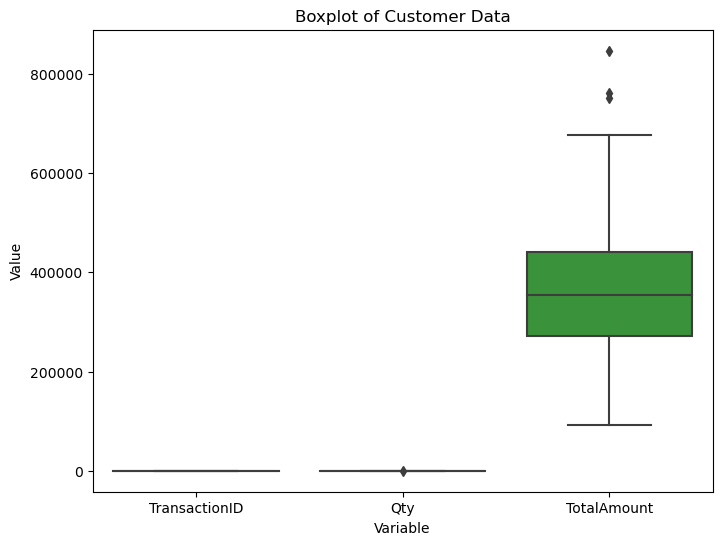

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(8, 6))  # Set the size of the figure
sns.boxplot(data=new_data[['TransactionID', 'Qty','TotalAmount']])  # Create the boxplot
plt.title('Boxplot of Customer Data')  # Set the title of the plot
plt.xlabel('Variable')  # Set the label for the x-axis
plt.ylabel('Value')  # Set the label for the y-axis
plt.show()  # Show the plot

In [26]:
print(f'Jumlah Baris Sebelum Outlier Dihapus: {len(new_data)}')
filtered_entries = np.array([True] * len(new_data))
for col in['Qty','TotalAmount']:
    
    q1=new_data[col].quantile(0.25)
    q3=new_data[col].quantile(0.75)
    iqr=q3-q1

    min_IQR = q1 - (1.5 * iqr)
    max_IQR = q3 + (1.5 * iqr)

    filtered_entries=((new_data[col]>=min_IQR) & (new_data[col]<=max_IQR)) & filtered_entries
    new_data=new_data[filtered_entries]

print(f'Jumlah Baris Sebelum Outlier Dihapus: {len(new_data)}')

Jumlah Baris Sebelum Outlier Dihapus: 447
Jumlah Baris Sebelum Outlier Dihapus: 444


C:\Users\Acer\AppData\Local\Temp\ipykernel_11460\3539918962.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data=new_data[filtered_entries]


## Scatter Plot Qty & TotalAmount

<AxesSubplot:xlabel='Qty', ylabel='TotalAmount'>

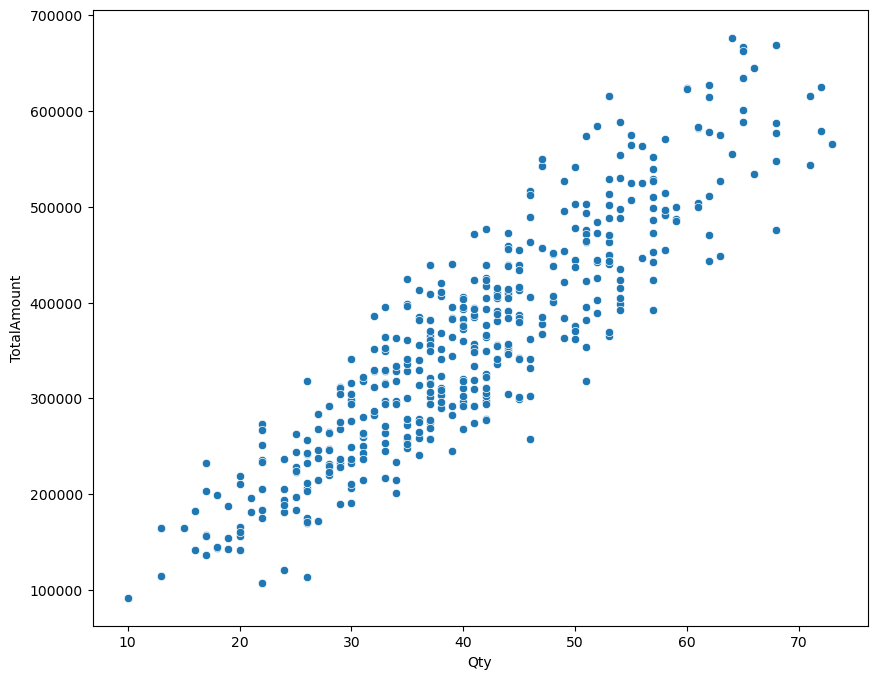

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=new_data, x='Qty', y='TotalAmount')

## Clustering Process

In [28]:
# Define the list of feature names
feats = ['TransactionID', 'Qty', 'TotalAmount']

# Select the specified columns as feature values
X = new_data[feats].values

# Import the StandardScaler class
from sklearn.preprocessing import StandardScaler

# Standardize the feature values
X_std = StandardScaler().fit_transform(X)

# Create a new DataFrame with standardized features
new_df = pd.DataFrame(data=X_std, columns=feats)

# Generate descriptive statistics for the new DataFrame
new_df.describe()

,TransactionID,Qty,TotalAmount
count,4.440000e+02,4.440000e+02,4.440000e+02
mean,-2.097921e-16,-2.806189e-16,6.176241e-17
std,1.001128e+00,1.001128e+00,1.001128e+00
min,-2.572626e+00,-2.461967e+00,-2.231910e+00
25%,-6.840960e-01,-6.977168e-01,-7.422282e-01
50%,-5.458590e-02,-5.617135e-02,-5.380058e-02
75%,5.749242e-01,7.457605e-01,6.682038e-01
max,3.092964e+00,2.590204e+00,2.640681e+00


##  Elbow Method: Inertia 

In [29]:
## Mencari N CLuster yang pas

from sklearn.cluster import KMeans  # Import the KMeans class
inertia = []  # Initialize an empty list to store inertia values

# Loop through different numbers of clusters
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)  # Create a KMeans instance with the specified number of clusters
  kmeans.fit(X_std)  # Fit the KMeans model to the standardized feature values
  nilai_inertia = kmeans.inertia_  # Get the inertia value of the clustering result
  print('iterasi ke-', i, 'dengan nilai inertia: ', nilai_inertia)  # Print the iteration number and inertia value
  inertia.append(kmeans.inertia_)  # Append the inertia value to the list

iterasi ke- 2 dengan nilai inertia:  533.3310983309085
iterasi ke- 3 dengan nilai inertia:  307.07838526608884
iterasi ke- 4 dengan nilai inertia:  228.38120996564427
iterasi ke- 5 dengan nilai inertia:  187.1766160966264
iterasi ke- 6 dengan nilai inertia:  167.6388692607962
iterasi ke- 7 dengan nilai inertia:  150.86122190651457
iterasi ke- 8 dengan nilai inertia:  136.79703500697735
iterasi ke- 9 dengan nilai inertia:  126.76482059425223
iterasi ke- 10 dengan nilai inertia:  118.71790798475894


<AxesSubplot:>

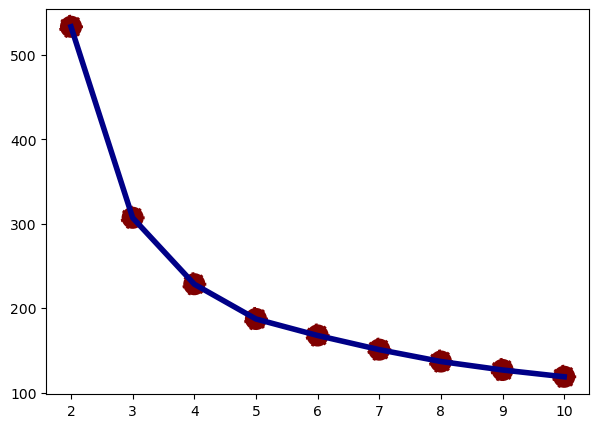

In [30]:
plt.figure(figsize=(7, 5))  # Set the size of the figure

# Plot the line plot of inertia values
sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth=4)

# Plot the scatter plot of inertia values
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000', linestyle='--')

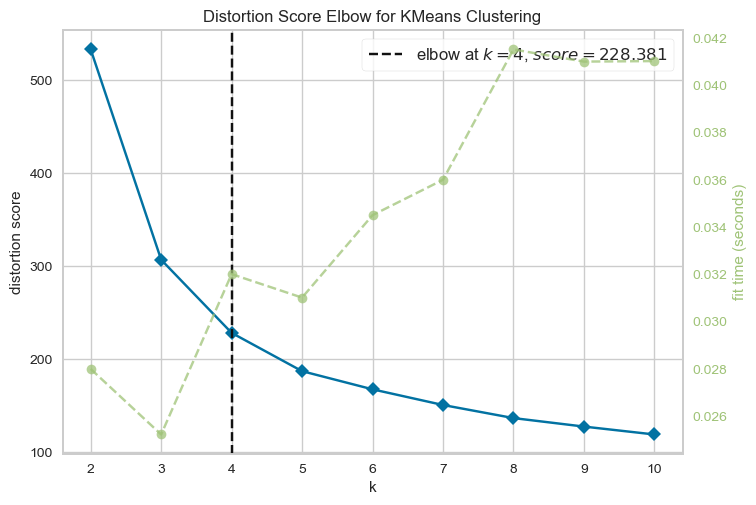

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# visualisasi innertia vs k dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(X_std)       
visualizer.show() 

## silhouette_score

In [32]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [33]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(X_std)
    preds = kmeans.predict(new_df)
     
    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\skl

<AxesSubplot:>

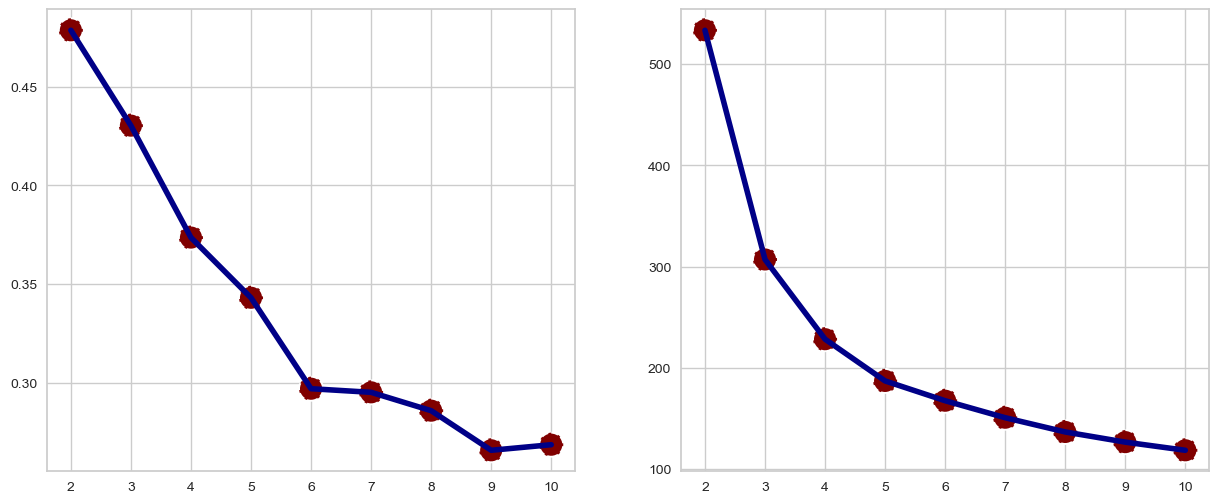

In [34]:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.lineplot(x=range(2, 11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4, ax=ax[0])
sns.scatterplot(x=range(2, 11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--',ax=ax[0])

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4,ax=ax[1])
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--', ax=ax[1])

In [35]:
from sklearn.metrics import silhouette_score

# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_std)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.4785336566154291
For n_clusters=3, the silhouette score is 0.43024766443752116
For n_clusters=4, the silhouette score is 0.37356019010244657
For n_clusters=5, the silhouette score is 0.34308149406666966
For n_clusters=6, the silhouette score is 0.2964638348670696
For n_clusters=7, the silhouette score is 0.29452849758131416
For n_clusters=8, the silhouette score is 0.28563081487311376
For n_clusters=9, the silhouette score is 0.2715813004192879
For n_clusters=10, the silhouette score is 0.27235548713335705
For n_clusters=11, the silhouette score is 0.26966479548406985


For n_clusters=2, the silhouette score is 0.4785336566154291
For n_clusters=3, the silhouette score is 0.43024766443752116
For n_clusters=4, the silhouette score is 0.37356019010244657
For n_clusters=5, the silhouette score is 0.34308149406666966
For n_clusters=6, the silhouette score is 0.29915950424866605
For n_clusters=7, the silhouette score is 0.2759107253066315
For n_clusters=8, the silhouette score is 0.28851828639548605
For n_clusters=9, the silhouette score is 0.26827292096462474
For n_clusters=10, the silhouette score is 0.26937964948569315
For n_clusters=11, the silhouette score is 0.27102712842609566


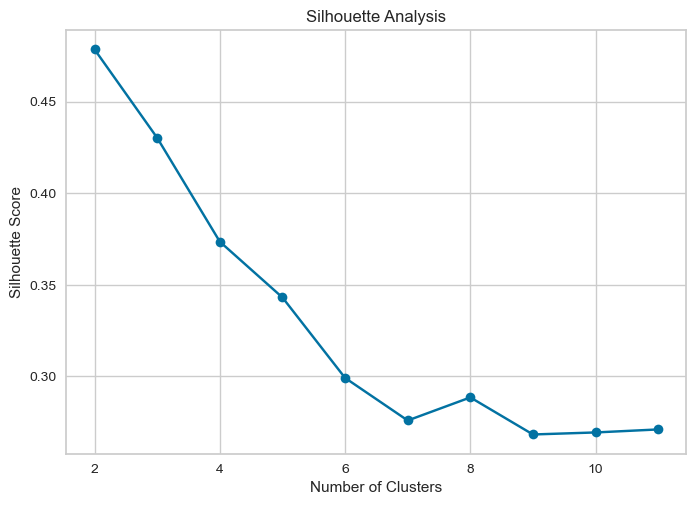

In [36]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
silhouette_scores = []  # Initialize an empty list to store the silhouette scores

for num_clusters in range_n_clusters:
    # Initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_std)
    
    cluster_labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    silhouette_scores.append(silhouette_avg)  # Append the silhouette score to the list
    
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

# Create a line plot of silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

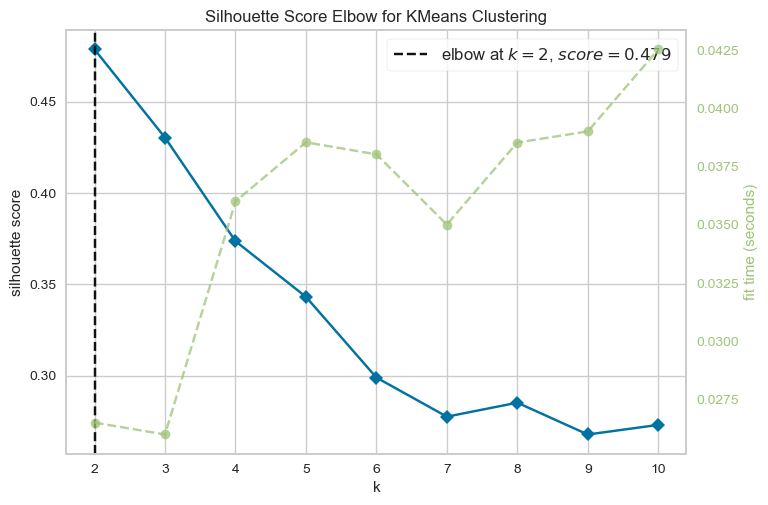

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [37]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=True, locate_elbow=True)
visualizer.fit(X_std)        
visualizer.show()    

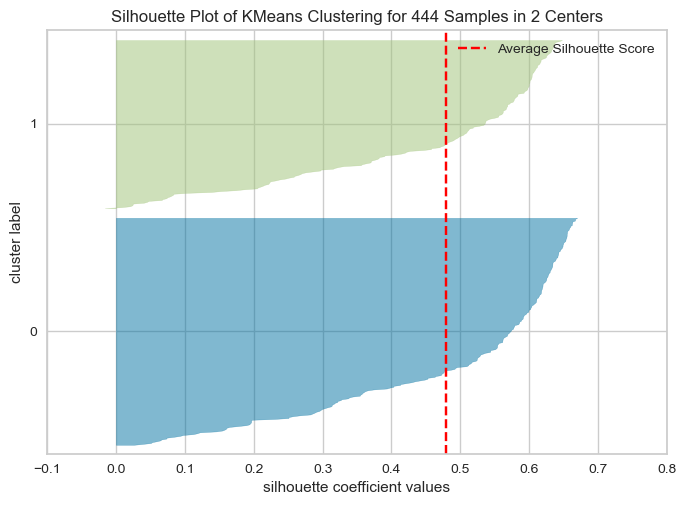

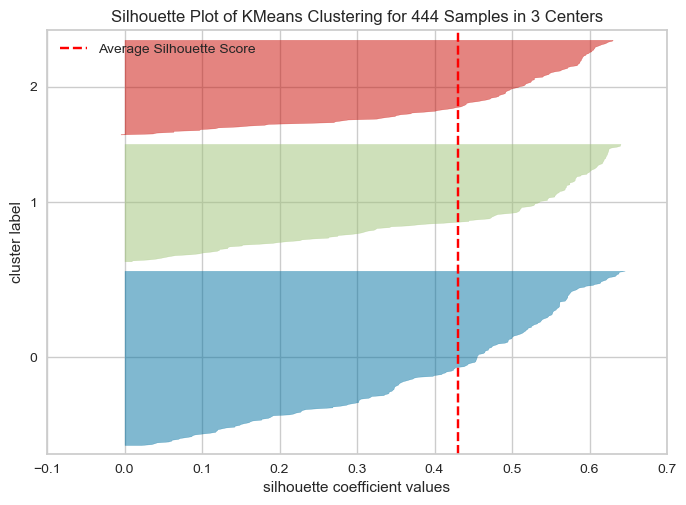

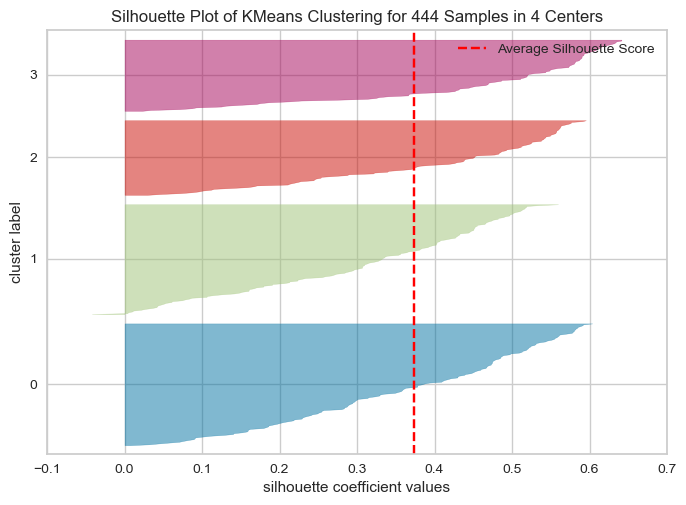

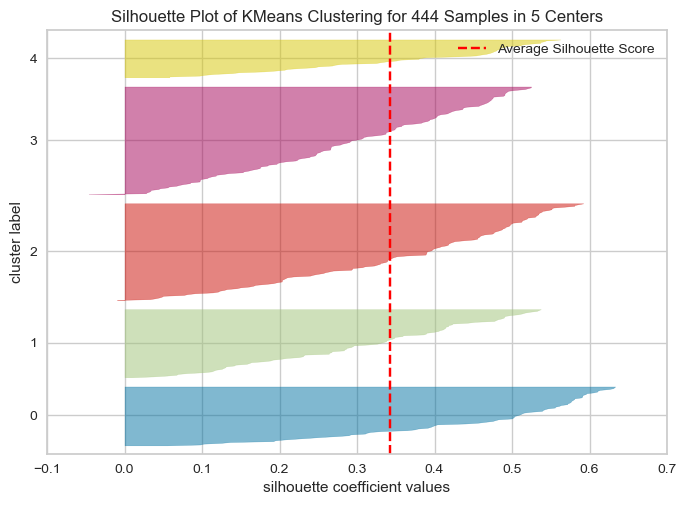

In [38]:
# silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

for i in [2,3,4,5]:
    model = KMeans(i, random_state=123)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X_std)        
    visualizer.show()

In [39]:
from sklearn.cluster import KMeans  # Import the KMeans class

kmeans = KMeans(n_clusters=4, random_state=0)  # Create a KMeans instance with 3 clusters
kmeans.fit(X_std)  # Fit the KMeans model to the standardized feature values

new_data['cluster'] = kmeans.labels_
new_data.head(10)

,CustomerID,TransactionID,Qty,TotalAmount,cluster
0,1,17,60,623300,2
1,2,13,57,392300,0
2,3,15,56,446200,2
3,4,10,46,302500,3
4,5,7,27,268600,1
5,6,10,44,459100,0
6,7,17,57,498800,2
7,8,14,47,542100,2
8,9,10,44,349200,3
9,10,14,50,478000,0


<AxesSubplot:xlabel='Qty', ylabel='TotalAmount'>

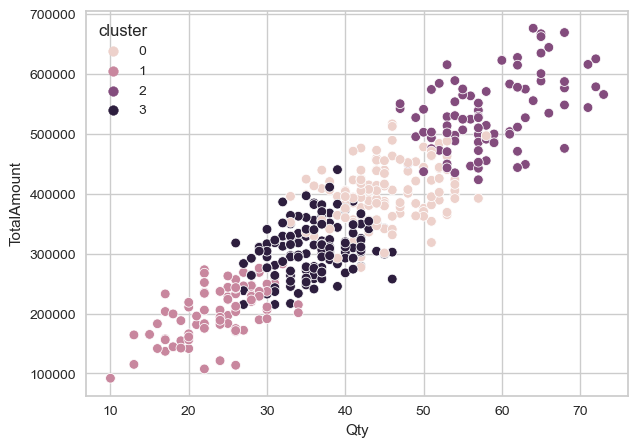

In [40]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=new_data, x='Qty', y='TotalAmount', hue='cluster')

In [41]:
display(new_data.groupby('cluster').agg(['mean','median']))

CustomerID        TransactionID               Qty         \
               mean median          mean median       mean median   
cluster                                                             
0        214.147287  201.0     12.449612   12.0  44.906977   44.0   
1        255.511905  277.5      6.869048    7.0  23.869048   25.0   
2        211.806818  220.5     15.534091   16.0  58.431818   57.0   
3        220.664336  224.0      9.867133   10.0  35.881119   36.0   

           TotalAmount            
                  mean    median  
cluster                           
0        400913.953488  400700.0  
1        202398.809524  205800.0  
2        533498.863636  527000.0  
3        307811.188811  305200.0

In [42]:
display(new_data.groupby('cluster').agg(['min','max']))

CustomerID      TransactionID     Qty     TotalAmount        
               min  max           min max min max         min     max
cluster                                                              
0                2  447             9  15  33  58      277000  516600
1                5  441             3   9  10  34       92100  282800
2                1  445            13  21  47  73      423300  676200
3                4  442             7  13  26  46      215100  440200

## Create new clustering model with 3 cluster

In [43]:
from sklearn.cluster import KMeans  # Import the KMeans class

kmeans = KMeans(n_clusters=3, random_state=0)  # Create a KMeans instance with 3 clusters
kmeans.fit(X_std)  # Fit the KMeans model to the standardized feature values

new_data['cluster'] = kmeans.labels_
new_data.head(10)

,CustomerID,TransactionID,Qty,TotalAmount,cluster
0,1,17,60,623300,2
1,2,13,57,392300,2
2,3,15,56,446200,2
3,4,10,46,302500,0
4,5,7,27,268600,1
5,6,10,44,459100,0
6,7,17,57,498800,2
7,8,14,47,542100,2
8,9,10,44,349200,0
9,10,14,50,478000,2


<AxesSubplot:xlabel='Qty', ylabel='TotalAmount'>

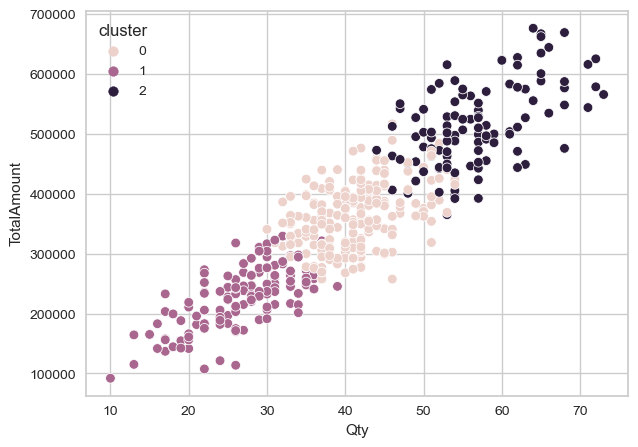

In [44]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=new_data, x='Qty', y='TotalAmount', hue='cluster')

In [45]:
display(new_data.groupby('cluster').agg(['mean','median']))

CustomerID        TransactionID               Qty         \
               mean median          mean median       mean median   
cluster                                                             
0        219.745000  214.5     11.250000   11.0  41.125000   41.0   
1        243.851852  255.0      7.785185    8.0  26.933333   28.0   
2        205.623853  210.0     15.229358   15.0  56.972477   57.0   

           TotalAmount            
                  mean    median  
cluster                           
0        362763.000000  362300.0  
1        229388.888889  235300.0  
2        515267.889908  503700.0